In [18]:
import sys
sys.path.append('../../Models')

import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

from RealNVP import *
from sklearn import datasets

In [2]:
# For reproducibility
seed = 42
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)

In [3]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [4]:
# Only run once, then load saved model
# flow = train(datasets, max_epochs=10000)

In [9]:
# Load flow
path_model = "TrainedModels/flow.pth"
flow = RealNVP(tfm_layers=6, latent_dim=2, device=device).to(device)
flow.load_state_dict(torch.load(path_model))
flow.eval()

RealNVP(
  (block_scale): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=256, out_features=2, bias=True)
    (5): Tanh()
  )
  (block_trans): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=256, out_features=2, bias=True)
  )
  (net_trans): ModuleList(
    (0): Sequential(
      (0): Linear(in_features=2, out_features=256, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=256, out_features=256, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=256, out_features=2, bias=True)
    )
    (1): Sequential(
      (0): Linear(in_features=2, out_f

Text(0.5, 1.0, '$X = g(z)$')

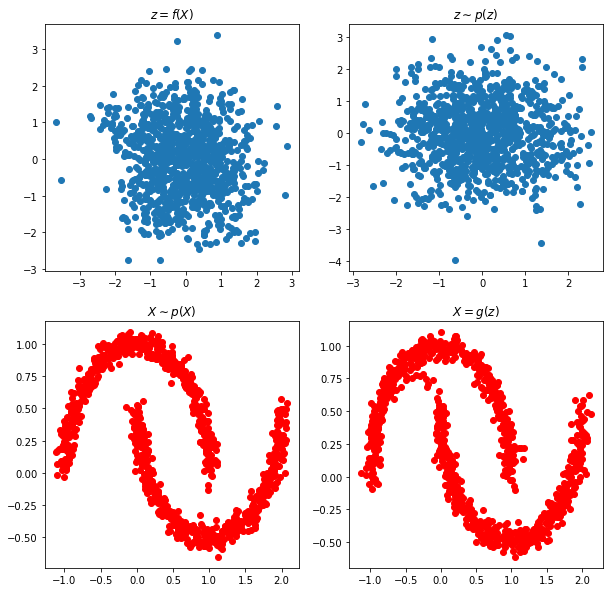

In [22]:
fig = plt.figure()
fig.patch.set_facecolor('w')

noisy_moons = datasets.make_moons(n_samples=1000, noise=.05)[0].astype(np.float32)
z = flow.to_latent(torch.from_numpy(noisy_moons).to(device))[0].cpu().detach().numpy()

plt.subplot(221)
plt.scatter(z[:, 0], z[:, 1])
plt.title(r'$z = f(X)$')

z = np.random.multivariate_normal(np.zeros(2), np.eye(2), 1000)
plt.subplot(222)
plt.scatter(z[:, 0], z[:, 1])
plt.title(r'$z \sim p(z)$')

plt.subplot(223)
x = datasets.make_moons(n_samples=1000, noise=.05)[0].astype(np.float32)
plt.scatter(x[:, 0], x[:, 1], c='r')
plt.title(r'$X \sim p(X)$')

plt.subplot(224)
x = flow.sample(1000).detach().cpu().numpy()
plt.scatter(x[:, 0, 0], x[:, 0, 1], c='r')
plt.title(r'$X = g(z)$')

## X ~ p(X) -> z = f(X)

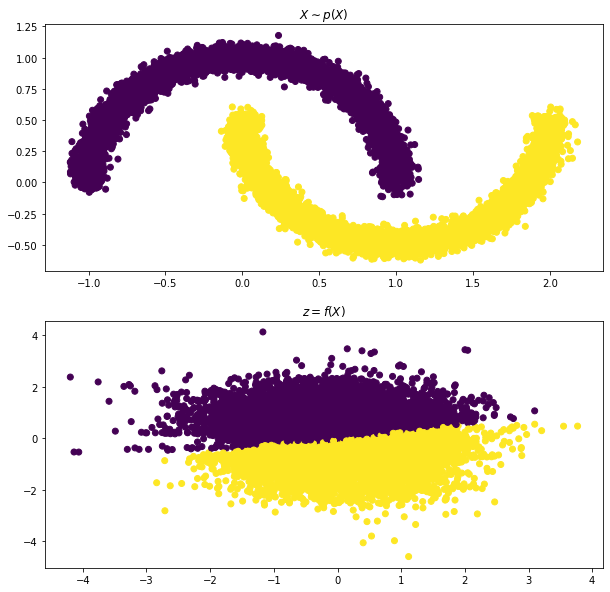

In [26]:
plt.close(fig)

fig = plt.figure()
fig.patch.set_facecolor('w')

x, y = datasets.make_moons(n_samples=10000, noise=.05)
x = x.astype(np.float32)

plt.subplot(211)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.title(r'$X \sim p(X)$')

z = flow.to_latent(torch.from_numpy(x).to(device))[0].cpu().detach().numpy()

plt.subplot(212)
plt.scatter(z[:, 0], z[:, 1], c=y)
plt.title(r'$z = f(X)$')

plt.savefig("Outputs/clustered", transparent=False)

## Scratch